In [1]:
%matplotlib inline


# SVM: Separating hyperplane for unbalanced classes

Find the optimal separating hyperplane using an SVC for classes that
are unbalanced.

We first find the separating plane with a plain SVC and then plot
(dashed) the separating hyperplane with automatically correction for
unbalanced classes.

.. currentmodule:: sklearn.linear_model

<div class="alert alert-info"><h4>Note</h4><p>This example will also work by replacing ``SVC(kernel="linear")``
    with ``SGDClassifier(loss="hinge")``. Setting the ``loss`` parameter
    of the :class:`SGDClassifier` equal to ``hinge`` will yield behaviour
    such as that of a SVC with a linear kernel.

    For example try instead of the ``SVC``::

        clf = SGDClassifier(n_iter=100, alpha=0.01)</p></div>


Automatically created module for IPython interactive environment


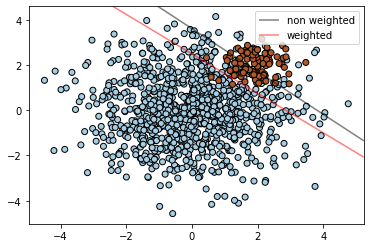

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()